In [1]:
%reset -f

In [2]:


from PyLTSpice import RawRead
from PlotManager import PlotManager
from ipywidgets import interact
import numpy as np
%matplotlib inline

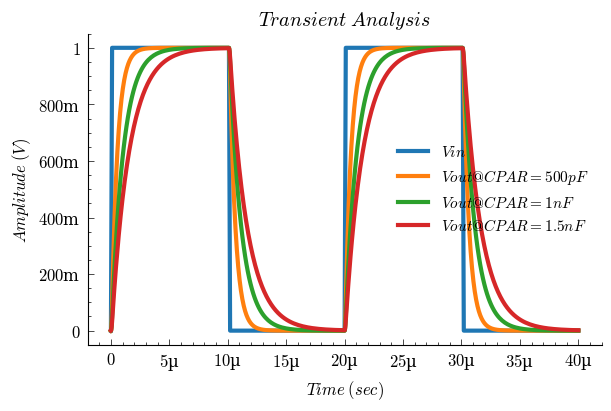

In [3]:

style = 'prof'
pm = PlotManager(style=style,figsize=(6,4))
LTR = RawRead("../simple_rc_tran.raw")
# print(LTR.get_trace_names())
# print(LTR.get_raw_property())

v1 = LTR.get_trace("V(1)")
x = LTR.get_trace('time')  # Gets the time axis
pm.quick_plot(x=x.get_wave(),
              y=v1.get_wave(),
              )

v2 = LTR.get_trace("V(2)")
steps = LTR.get_steps()
for step in range(len(steps)):
    # print(steps[step])
    # plt.plot(x.get_wave(step), v2.get_wave(step), label=steps[step])
    pm.quick_plot(x=x.get_wave(step),
                  y=v2.get_wave(step),
                  x_label="$Time\\;(sec)$",
                  y_label="$Amplitude\\;(V)$",
                  title="$Transient\\;Analysis$",
                  legend=['$Vin$', '$Vout@CPAR=500pF$',
                          '$Vout@CPAR=1nF$', '$Vout@CPAR=1.5nF$'],
                  y_scale='linear'
                  )

pm.show_plot()

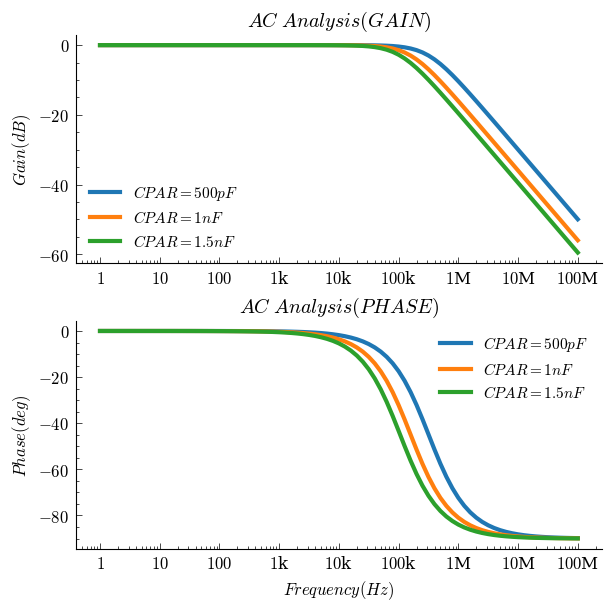

In [4]:
pm2 = PlotManager(style=style,figsize=(6,6))
LTR2 = RawRead("../simple_rc_ac.raw")

x = LTR2.get_trace('frequency')  # Gets the time axis

v2 = LTR2.get_trace("V(2)")

steps = LTR2.get_steps()
# print(magV2)
for step in range(len(steps)):
    # print(steps[step])
    # plt.plot(x.get_wave(step), v2.get_wave(step), label=steps[step])
    freq = np.abs(x.get_wave(step))
    magV2 = 20 * np.log10(np.abs(v2.get_wave(step)))
    pm2.quick_plot(x=freq,
                   y=magV2,
                   x_label="$Frequency (Hz)$",
                   y_label="$Gain (dB)$",
                   title="$AC\\;Analysis(GAIN)$",
                   legend=['$CPAR=500pF$',
                           '$CPAR=1nF$', '$CPAR=1.5nF$'],
                   y_scale='linear',
                   x_scale='log'
                   )
pm2.add_axis()
for step in range(len(steps)):
    # print(steps[step])
    # plt.plot(x.get_wave(step), v2.get_wave(step), label=steps[step])
    freq = np.abs(x.get_wave(step))
    phV2 = np.angle(v2.get_wave(step), deg=True)
    pm2.quick_plot(x=freq,
                   y=phV2,
                   x_label="$Frequency (Hz)$",
                   y_label="$Phase (deg)$",
                   title="$AC\\;Analysis(PHASE)$",
                   legend=['$CPAR=500pF$',
                           '$CPAR=1nF$', '$CPAR=1.5nF$'],
                   y_scale='linear',
                   x_scale='log'
                   )

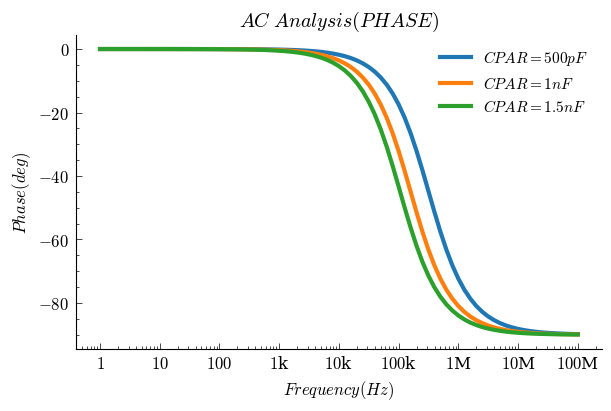

In [5]:

pm3 = PlotManager(style=style)
for step in range(len(steps)):
    # print(steps[step])
    # plt.plot(x.get_wave(step), v2.get_wave(step), label=steps[step])
    freq = np.abs(x.get_wave(step))
    phV2 = np.angle(v2.get_wave(step), deg=True)
    pm3.quick_plot(x=freq,
                   y=phV2,
                   x_label="$Frequency (Hz)$",
                   y_label="$Phase (deg)$",
                   title="$AC\\;Analysis(PHASE)$",
                   legend=['$CPAR=500pF$',
                           '$CPAR=1nF$', '$CPAR=1.5nF$'],
                   y_scale='linear',
                   x_scale='log'
                   )
    

1

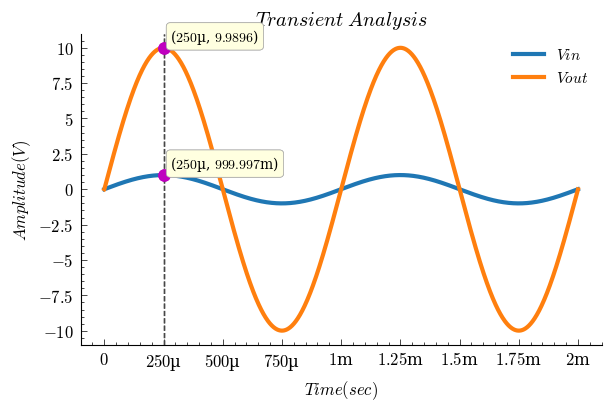

In [6]:
pm4 = PlotManager(style=style)
LTR5 = RawRead("../opamp_tran_tb.raw",'*')
# print(LTR.get_trace_names())
# print(LTR.get_raw_property())
# print(LTR5.get_raw_property())
out = LTR5.get_trace("V(out)")
pos = LTR5.get_trace("V(pos)")
neg = LTR5.get_trace("V(neg)")
x = LTR5.get_trace('time')  # Gets the time axis

pm4.quick_plot(x=[x.get_wave(), x.get_wave()],
               y=[pos.get_wave(), out.get_wave()],
               x_label="$Time (sec)$",
               y_label="$Amplitude (V)$",
               title="$Transient\\;Analysis$",
               legend=['$Vin$', '$Vout$',
                       '$Vout@CPAR=1nF$', '$Vout@CPAR=1.5nF$'],
               y_scale='linear'
               )



pm4.add_vertical_cursor_at(250e-6)

1

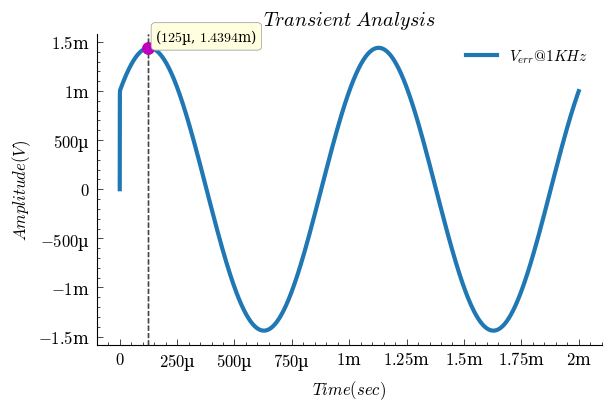

In [7]:
pm5 = PlotManager(style=style)
pm5.quick_plot(x=x.get_wave(),
               y=(pos.get_wave() - neg.get_wave()),
               x_label="$Time (sec)$",
               y_label="$Amplitude (V)$",
               title="$Transient\\;Analysis$",
               legend=['$V_{err}@1KHz$'],
               y_scale='linear'
               )
pm5.add_vertical_cursor_at(125e-6)

1

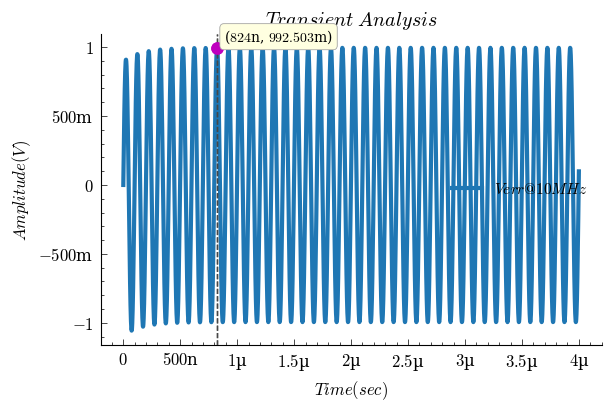

In [8]:
pm6= PlotManager(style=style)
LTR6 = RawRead("../opamp_tran_tb2.raw",'*')
out = LTR6.get_trace("V(out)")
pos = LTR6.get_trace("V(pos)")
neg = LTR6.get_trace("V(neg)")
x = LTR6.get_trace('time')  # Gets the time axis
pm6.quick_plot(x=x.get_wave(),
               y=(pos.get_wave() - neg.get_wave()),
               x_label="$Time (sec)$",
               y_label="$Amplitude (V)$",
               title="$Transient\\;Analysis$",
               legend=['$Verr@10MHz$'],
               y_scale='linear'
               )
pm6.add_vertical_cursor_at(824e-9)

In [9]:
LTR8 = RawRead("../opamp_ac_tb.raw",'*')
x = LTR8.get_trace('frequency')  # Gets the time axis
v2 = LTR8.get_trace("V(out)")
steps = LTR8.get_steps()


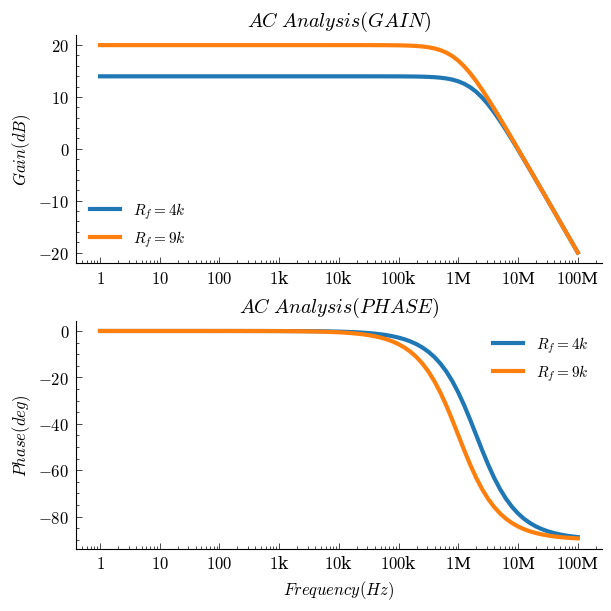

In [11]:
pm8 = PlotManager(style=style,figsize=(6,6))
for step in range(len(steps)):
#     print(steps[step])
    freq = np.abs(x.get_wave(step))
    magV2 = 20 * np.log10(np.abs(v2.get_wave(step)))
    pm8.quick_plot(x=freq,
                   y=magV2,
                   x_label="$Frequency (Hz)$",
                   y_label="$Gain (dB)$",
                   title="$AC\\;Analysis(GAIN)$",
                   legend=['$R_f=4k$',
                           '$R_f=9k$'],
                   y_scale='linear',
                   x_scale='log'
                   )
# pm8.add_axis()
# for step in range(len(steps)):

#         freq = np.abs(x.get_wave(step))
#         phV2 = np.angle(v2.get_wave(step), deg=True)
#         pm8.quick_plot(x=freq,
#                         y=phV2,
#                         x_label="$Frequency (Hz)$",
#                         y_label="$Phase (deg)$",
#                         title="$AC\\;Analysis(PHASE)$",
#                         legend=['$R_f=4k$',
#                                 '$R_f=9k$'],
#                         y_scale='linear',
#                         x_scale='log'
#                         )
pm8.add_vertical_cursor_at(1)
pm8.add_horizontal_cursor_at(19.9913-3)
pm8.add_horizontal_cursor_at(13.9751-3,annotate_indices=1)
pm8.add_horizontal_cursor_at(0,annotate_indices=1)